# Data Preprocessing

In [225]:
import pandas as pd
data=pd.read_csv('IMDB Dataset.csv')
#Looking at the data
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [226]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

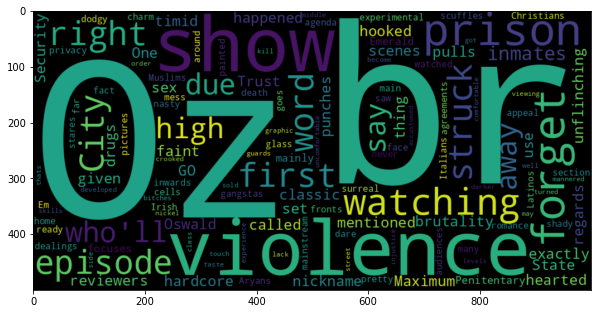

In [227]:
plt.figure(figsize=(10,10))
reviews=str(data['review'][0])
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
words=WC.generate(reviews)
plt.imshow(words,interpolation='bilinear')
plt.show()

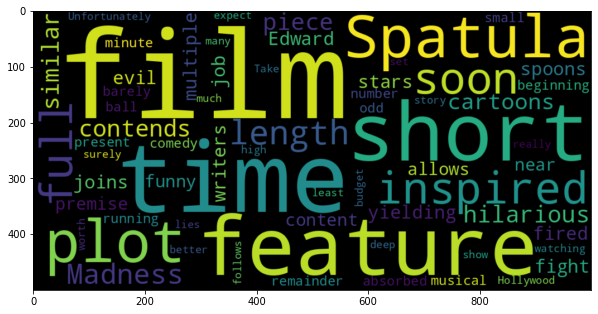

In [194]:
plt.figure(figsize=(10,10))
reviews=str(data['review'][100])
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
words=WC.generate(reviews)
plt.imshow(words,interpolation='bilinear')
plt.show()

# Clean text

In [228]:
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
data['review']=data['review'].apply(denoise_text)

In [229]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [230]:
import nltk
import string
#Fetching the list of stopwords in English
stopwords=nltk.corpus.stopwords.words('english')
import re
#Removing punctuations and stopwords
def clean_text(text):
    text="".join([
        c for c in text if c not in string.punctuation
    ])
    tokens=re.split('\W+',text)
    text=[
        word for word in tokens if word not in stopwords
    ]
    return text

In [231]:
data['review_nostop']=data['review'].apply(
lambda x: clean_text(x.lower())
)

In [232]:
data.head()

,review,sentiment,review_nostop
0,One of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,A wonderful little production. The filming tec...,positive,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,"[basically, theres, family, little, boy, jake,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, matteis, love, time, money, visually,..."


# Lower Case

In [233]:
#Converting each word into lowercase
for item in range(data.shape[0]):
    data.review[item]=data.review[item].lower()

In [234]:
data.head()

,review,sentiment,review_nostop
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production. the filming tec...,positive,"[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there's a family where a little boy ...,negative,"[basically, theres, family, little, boy, jake,..."
4,"petter mattei's ""love in the time of money"" is...",positive,"[petter, matteis, love, time, money, visually,..."


# Removing special characters

In [235]:
#Removing special characters
import re,string,unicodedata
def remove_spec_char(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data['review']=data['review'].apply(remove_spec_char)

In [236]:
data.head()

,review,sentiment,review_nostop
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically theres a family where a little boy j...,negative,"[basically, theres, family, little, boy, jake,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,..."


# Stemming

In [237]:
ps=nltk.porter.PorterStemmer()
def stemming(tokenized_text):
    text=[
        ps.stem(word) for word in tokenized_text
    ]
    return text

In [238]:
data['rev_nostop_stemmed']=data['review_nostop'].apply(
    
    lambda x: stemming(x)
    
)

In [239]:
data.head()

,review,sentiment,review_nostop,rev_nostop_stemmed
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...","[one, review, mention, watch, 1, oz, episod, y..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe..."
3,basically theres a family where a little boy j...,negative,"[basically, theres, family, little, boy, jake,...","[basic, there, famili, littl, boy, jake, think..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,...","[petter, mattei, love, time, money, visual, st..."


In [240]:
new_data=data

In [243]:
#Converting tokens into string
for elem in range(new_data.shape[0]):
    new_data.rev_nostop_stemmed[elem]=' '.join(new_data.rev_nostop_stemmed[elem])

In [244]:
data.head()

,review,sentiment,review_nostop,rev_nostop_stemmed
0,one of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching 1 oz episode ...,one review mention watch 1 oz episod youll hoo...
1,a wonderful little production the filming tech...,positive,wonderful little production filming technique ...,wonder littl product film techniqu unassum old...
2,i thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,thought wonder way spend time hot summer weeke...
3,basically theres a family where a little boy j...,negative,basically theres family little boy jake thinks...,basic there famili littl boy jake think there ...
4,petter matteis love in the time of money is a ...,positive,petter matteis love time money visually stunni...,petter mattei love time money visual stun film...


In [245]:
data.to_csv('processed_IMDB_final.csv')